In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from fiona.drvsupport import supported_drivers
supported_drivers['KML'] = 'rw'
import shapely.speedups
shapely.speedups.enable()

In [2]:
fires_file = '../fires/raw_data/H_FIRE_PNT.csv'
shape_file = '../fires/raw_data/BC_Regional_Districts.kml'
labels_file = '../fires/raw_data/labels.csv'
weather_station_file = '../fires/raw_data/weather_stations_coordinates.csv'

In [3]:
labels = pd.read_csv(labels_file)

In [4]:
polys = gpd.read_file(shape_file, driver='KML')

In [8]:
df = pd.read_csv(fires_file)

/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_40785/1511561435.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fires_file)


In [9]:
loc = pd.read_csv(weather_station_file)

In [10]:
df['Year'] = df['IGN_DATE'].astype(str).str[:4]
df['Month'] = df['IGN_DATE'].astype(str).str[4:6]
df = df[df['FIRE_TYPE'] == 'Fire']
df = df[df['Year'].astype(float) > 2000].reset_index(drop=True)

In [11]:
data = df[['FIRE_CAUSE', 'LATITUDE', 'LONGITUDE', 'SIZE_HA', 'Year', 'Month']]

In [12]:
data

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month
0      Lightning   52.7163  -120.8649    0.009  2014    08
1      Lightning   51.3333  -120.8167    0.009  2003    07
2         Person   55.7837  -120.9953    2.500  2003    09
3      Lightning   51.1633  -118.9430    0.009  2007    07
4      Lightning   54.8516  -127.6553    0.009  2009    07
...          ...       ...        ...      ...   ...   ...
35006     Person   49.3728  -116.0612   29.000  2021    07
35007  Lightning   48.5600  -124.2433    0.300  2021    07
35008  Lightning   50.3275  -120.3483    0.100  2021    07
35009  Lightning   50.4047  -115.8580    0.009  2021    07
35010  Lightning   55.8000  -124.8167    0.010  2005    06

[35011 rows x 6 columns]

In [13]:
temp = data.copy()

In [14]:
for i in range(loc.shape[0]):
    temp[loc.loc[i,'0']] = np.sqrt((temp['LATITUDE'] - loc.loc[i,'1'])**2 + (temp['LONGITUDE'] - loc.loc[i,'2'])**2)
temp = temp.iloc[:,9:]

In [15]:
for i in range(temp.shape[0]):
    temp.loc[i,'Weather City'] = temp.iloc[i][temp.iloc[i] == temp.iloc[i].min()].index[0]

In [19]:
temp

Prince George   Smithers  Williams Lake     Tofino  Port Hardy  \
0           2.161038   6.660407       1.303344   6.106641    6.812572   
1           3.163657   7.260646       1.501136   5.443097    6.581886   
2           2.533262   6.261351       3.753111   8.229912    8.162852   
3           4.625614   9.016649       3.274028   7.139535    8.436949   
4           5.068307   0.473286       6.204339   6.068827    4.181335   
...              ...        ...            ...        ...         ...   
35006       8.012892  12.385998       6.619153   9.715646   11.380269   
35007       5.555643   6.920063       4.233065   1.615911    3.774590   
35008       4.257815   8.181387       2.520529   5.565309    7.026672   
35009       7.660134  12.156775       6.446319  10.002313   11.511410   
35010       2.866209   2.559197       4.551250   6.785432    5.719358   

       Vancouver  Whistler  Penticton  Prince Rupert  Dawson Creek     Nakusp  \
0       4.215240  3.325967   3.489693       9.560610      3.101495   3.933986   
1       3.188528  2.453924   2.229971       9.933048      4.453831   3.205311   
2       6.942073  5.984666   6.472342       9.409200      0.814441   6.389975   
3       4.673634  4.142936   1.823569      11.777984      4.743040   1.463067   
4       7.211660  6.663290   9.689606       2.687740      7.526172  10.876657   
...          ...       ...        ...            ...           ...        ...   
35006   7.122964  6.934863   3.542172      15.064405      7.585710   1.947538   
35007   1.236811  2.030233   4.728119       8.351250      8.250512   6.661247   
35008   3.051573  2.613978   1.141883      10.713528      5.416722   2.549478   
35009   7.423176  7.102080   3.860815      14.953741      6.868749   1.948152   
35010   6.804296  5.968958   8.206561       5.669796      4.635123   8.946316   

       Dease Lake  Bella Coola   Sparwood     Golden  Fort Nelson  \
0       10.782873     5.740358   6.679278   4.133213     6.360537   
1       11.613203     5.874497   6.142739   3.834630     7.711459   
2        9.395154     6.549820   8.592175   6.017959     3.447472   
3       13.239014     7.750131   4.300720   1.965479     8.498802   
4        4.282552     2.682211  13.755430  11.248750     6.439153   
...           ...          ...        ...        ...          ...   
35006   16.630911    10.957505   1.235888   2.135221    11.501265   
35007   11.430015     4.492680   9.435267   7.760560    10.407389   
35008   12.608834     6.578394   5.496446   3.503515     8.801070   
35009   16.268790    10.919366   1.177241   1.436644    10.794003   
35010    5.821020     3.848438  11.633678   9.035294     3.761082   

        Weather City  
0      Williams Lake  
1      Williams Lake  
2       Dawson Creek  
3             Nakusp  
4           Smithers  
...              ...  
35006       Sparwood  
35007      Vancouver  
35008      Penticton  
35009       Sparwood  
35010       Smithers  

[35011 rows x 17 columns]

In [20]:
data['Weather City'] = temp['Weather City']

/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_40785/1805379182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather City'] = temp['Weather City']


In [21]:
data

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month   Weather City
0      Lightning   52.7163  -120.8649    0.009  2014    08  Williams Lake
1      Lightning   51.3333  -120.8167    0.009  2003    07  Williams Lake
2         Person   55.7837  -120.9953    2.500  2003    09   Dawson Creek
3      Lightning   51.1633  -118.9430    0.009  2007    07         Nakusp
4      Lightning   54.8516  -127.6553    0.009  2009    07       Smithers
...          ...       ...        ...      ...   ...   ...            ...
35006     Person   49.3728  -116.0612   29.000  2021    07       Sparwood
35007  Lightning   48.5600  -124.2433    0.300  2021    07      Vancouver
35008  Lightning   50.3275  -120.3483    0.100  2021    07      Penticton
35009  Lightning   50.4047  -115.8580    0.009  2021    07       Sparwood
35010  Lightning   55.8000  -124.8167    0.010  2005    06       Smithers

[35011 rows x 7 columns]

In [22]:
temp_points = [Point(data.loc[i, 'LONGITUDE'], data.loc[i, 'LATITUDE'])  for i in range(data.shape[0])]
data['points'] = gpd.GeoSeries(temp_points)

/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_40785/1192270581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['points'] = gpd.GeoSeries(temp_points)


In [23]:
data

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month   Weather City  \
0      Lightning   52.7163  -120.8649    0.009  2014    08  Williams Lake   
1      Lightning   51.3333  -120.8167    0.009  2003    07  Williams Lake   
2         Person   55.7837  -120.9953    2.500  2003    09   Dawson Creek   
3      Lightning   51.1633  -118.9430    0.009  2007    07         Nakusp   
4      Lightning   54.8516  -127.6553    0.009  2009    07       Smithers   
...          ...       ...        ...      ...   ...   ...            ...   
35006     Person   49.3728  -116.0612   29.000  2021    07       Sparwood   
35007  Lightning   48.5600  -124.2433    0.300  2021    07      Vancouver   
35008  Lightning   50.3275  -120.3483    0.100  2021    07      Penticton   
35009  Lightning   50.4047  -115.8580    0.009  2021    07       Sparwood   
35010  Lightning   55.8000  -124.8167    0.010  2005    06       Smithers   

                            points  
0      POINT (-120.86490 52.71630)  
1      POINT (-120.81670 51.33330)  
2      POINT (-120.99530 55.78370)  
3      POINT (-118.94300 51.16330)  
4      POINT (-127.65530 54.85160)  
...                            ...  
35006  POINT (-116.06120 49.37280)  
35007  POINT (-124.24330 48.56000)  
35008  POINT (-120.34830 50.32750)  
35009  POINT (-115.85800 50.40470)  
35010  POINT (-124.81670 55.80000)  

[35011 rows x 8 columns]

In [28]:
polys['Name'] = labels['name']
polys['Description'] = labels['code']

In [29]:
north_rockies_square = Polygon([(-128.5,57), (-128.5, 60.000032445248), (-120.001332758301,60.000032445248), (-120.001332758301, 57)])
peace_river = polys.loc[4,'geometry']
stikine = polys.loc[27,'geometry']


In [30]:
temp_upper_right = unary_union([north_rockies_square,peace_river,stikine])
temp_p_s = unary_union([peace_river,stikine])
north_rockies = temp_upper_right.difference(temp_p_s)

In [31]:
polys.loc[30] = ['Northern Rockies', 59, north_rockies]

<AxesSubplot: >

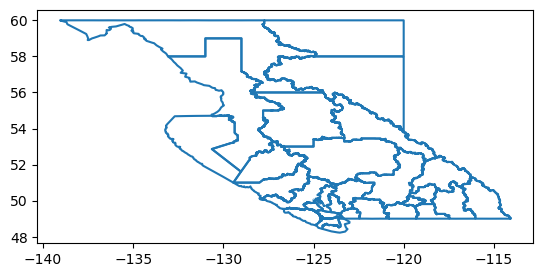

In [32]:
polys['geometry'].boundary.plot()

In [36]:
polys

Name  Description  \
0          Bulkey-Nechako           51   
1                 Cariboo           41   
2      Fraser-Fort George           53   
3             Peace River           55   
4             North Coast           47   
5        Central Okanagan           35   
6           Fraser Valley            9   
7       Greater Vancouver           15   
8    Okanagan-Similkameen            7   
9       Squamish-Lillooet           31   
10        Thompson-Nicola           33   
11       Central Kootenay            3   
12       Columbia-Shuswap           39   
13          East Kootenay            1   
14       Kooteny Boundary            5   
15         North Okanagan           37   
16       Alberni-Clayquot           23   
17                Capital           17   
18          Central Coast           45   
19           Comox Valley           26   
20        Cowichan Valley           19   
21       Mount Waddington           43   
22                Nanaimo           21   
23           Powell River           27   
24         Sunshine Coast           29   
25            Strathacona           24   
26                Silkine           57   
27  Kitimat-Stikine North           50   
28  Kitimat-Stikine South           49   
29       Northern Rockies           59   

                                             geometry  
0   POLYGON ((-123.42551 53.48487, -123.44910 53.4...  
1   POLYGON ((-122.07361 53.44866, -121.57252 53.4...  
2   POLYGON ((-123.54184 53.98767, -123.54138 53.9...  
3   POLYGON ((-120.00130 58.00001, -120.00130 57.9...  
4   POLYGON ((-129.37605 54.30253, -129.37605 54.3...  
5   POLYGON ((-119.66183 49.75896, -119.67325 49.7...  
6   POLYGON ((-121.07509 49.35381, -121.07460 49.3...  
7   POLYGON ((-122.77888 49.56987, -122.77886 49.5...  
8   POLYGON ((-120.85136 49.00031, -120.85120 49.0...  
9   POLYGON ((-122.94033 49.56997, -122.94015 49.5...  
10  POLYGON ((-121.42841 51.40859, -121.42866 51.4...  
11  POLYGON ((-117.70863 50.55061, -117.70866 50.5...  
12  POLYGON ((-117.70863 50.55061, -117.70938 50.5...  
13  POLYGON ((-116.28728 51.33426, -116.28702 51.3...  
14  POLYGON ((-117.68020 49.22452, -117.67904 49.2...  
15  POLYGON ((-119.18135 50.75076, -119.18135 50.7...  
16  POLYGON ((-126.50219 49.55176, -126.50218 49.5...  
17  POLYGON ((-123.51365 48.69838, -123.51405 48.6...  
18  POLYGON ((-126.34225 52.74658, -126.34255 52.7...  
19  POLYGON ((-125.49656 49.83932, -125.48639 49.8...  
20  POLYGON ((-124.50292 48.54470, -124.50292 48.5...  
21  POLYGON ((-126.99164 50.22376, -126.99147 50.2...  
22  POLYGON ((-123.86483 49.03690, -123.86628 49.0...  
23  MULTIPOLYGON (((-124.28428 49.70643, -124.2832...  
24  POLYGON ((-123.91262 50.36034, -123.91266 50.3...  
25  POLYGON ((-124.84281 51.30104, -124.84283 51.3...  
26  POLYGON ((-137.38298 60.00076, -137.36330 60.0...  
27  POLYGON ((-127.69503 55.69696, -127.69541 55.6...  
28  POLYGON ((-126.74512 55.19959, -126.74458 55.1...  
29  POLYGON ((-127.73424 60.00003, -120.00133 60.0...

In [33]:
data

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month   Weather City  \
0      Lightning   52.7163  -120.8649    0.009  2014    08  Williams Lake   
1      Lightning   51.3333  -120.8167    0.009  2003    07  Williams Lake   
2         Person   55.7837  -120.9953    2.500  2003    09   Dawson Creek   
3      Lightning   51.1633  -118.9430    0.009  2007    07         Nakusp   
4      Lightning   54.8516  -127.6553    0.009  2009    07       Smithers   
...          ...       ...        ...      ...   ...   ...            ...   
35006     Person   49.3728  -116.0612   29.000  2021    07       Sparwood   
35007  Lightning   48.5600  -124.2433    0.300  2021    07      Vancouver   
35008  Lightning   50.3275  -120.3483    0.100  2021    07      Penticton   
35009  Lightning   50.4047  -115.8580    0.009  2021    07       Sparwood   
35010  Lightning   55.8000  -124.8167    0.010  2005    06       Smithers   

                            points  
0      POINT (-120.86490 52.71630)  
1      POINT (-120.81670 51.33330)  
2      POINT (-120.99530 55.78370)  
3      POINT (-118.94300 51.16330)  
4      POINT (-127.65530 54.85160)  
...                            ...  
35006  POINT (-116.06120 49.37280)  
35007  POINT (-124.24330 48.56000)  
35008  POINT (-120.34830 50.32750)  
35009  POINT (-115.85800 50.40470)  
35010  POINT (-124.81670 55.80000)  

[35011 rows x 8 columns]

In [34]:
for i in range(data.shape[0]):
    t_region = polys[polys['geometry'].contains(data.loc[i,'points'])]
    if t_region.size == 3:
        data.loc[i,'Region Name'] = t_region['Name'].item()
        data.loc[i,'Region Number'] = t_region['Description'].item()
    elif t_region.size == 0:
        data.loc[i,'Region Name'] = 'Other'
        data.loc[i,'Region Number'] = -1
    else:
        print('error')

/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_40785/2057265163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i,'Region Name'] = t_region['Name'].item()
/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_40785/2057265163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i,'Region Number'] = t_region['Description'].item()


In [35]:
data

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month   Weather City  \
0      Lightning   52.7163  -120.8649    0.009  2014    08  Williams Lake   
1      Lightning   51.3333  -120.8167    0.009  2003    07  Williams Lake   
2         Person   55.7837  -120.9953    2.500  2003    09   Dawson Creek   
3      Lightning   51.1633  -118.9430    0.009  2007    07         Nakusp   
4      Lightning   54.8516  -127.6553    0.009  2009    07       Smithers   
...          ...       ...        ...      ...   ...   ...            ...   
35006     Person   49.3728  -116.0612   29.000  2021    07       Sparwood   
35007  Lightning   48.5600  -124.2433    0.300  2021    07      Vancouver   
35008  Lightning   50.3275  -120.3483    0.100  2021    07      Penticton   
35009  Lightning   50.4047  -115.8580    0.009  2021    07       Sparwood   
35010  Lightning   55.8000  -124.8167    0.010  2005    06       Smithers   

                            points       Region Name  Region Number  
0      POINT (-120.86490 52.71630)           Cariboo           41.0  
1      POINT (-120.81670 51.33330)   Thompson-Nicola           33.0  
2      POINT (-120.99530 55.78370)       Peace River           55.0  
3      POINT (-118.94300 51.16330)  Columbia-Shuswap           39.0  
4      POINT (-127.65530 54.85160)    Bulkey-Nechako           51.0  
...                            ...               ...            ...  
35006  POINT (-116.06120 49.37280)     East Kootenay            1.0  
35007  POINT (-124.24330 48.56000)           Capital           17.0  
35008  POINT (-120.34830 50.32750)   Thompson-Nicola           33.0  
35009  POINT (-115.85800 50.40470)     East Kootenay            1.0  
35010  POINT (-124.81670 55.80000)    Bulkey-Nechako           51.0  

[35011 rows x 10 columns]

In [36]:
data2 = data[data['Region Name'] != 'Other'].reset_index(drop=True)
data2.loc[data2['Region Number'].isin([24.0,26.0]), 'Region Name'] = 'Comox + Strathacona'
data2.loc[data2['Region Name'] == 'Comox + Strathacona', 'Region Number'] = 25.0
data2.loc[data2['Region Number'].isin([51.0,57.0]), 'Region Name'] = 'Bulkley-Nechako + Stikine'
data2.loc[data2['Region Name'] == 'Bulkley-Nechako + Stikine', 'Region Number'] = 51.0

In [37]:
data2

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year Month   Weather City  \
0      Lightning   52.7163  -120.8649    0.009  2014    08  Williams Lake   
1      Lightning   51.3333  -120.8167    0.009  2003    07  Williams Lake   
2         Person   55.7837  -120.9953    2.500  2003    09   Dawson Creek   
3      Lightning   51.1633  -118.9430    0.009  2007    07         Nakusp   
4      Lightning   54.8516  -127.6553    0.009  2009    07       Smithers   
...          ...       ...        ...      ...   ...   ...            ...   
34986     Person   49.3728  -116.0612   29.000  2021    07       Sparwood   
34987  Lightning   48.5600  -124.2433    0.300  2021    07      Vancouver   
34988  Lightning   50.3275  -120.3483    0.100  2021    07      Penticton   
34989  Lightning   50.4047  -115.8580    0.009  2021    07       Sparwood   
34990  Lightning   55.8000  -124.8167    0.010  2005    06       Smithers   

                            points                Region Name  Region Number  
0      POINT (-120.86490 52.71630)                    Cariboo           41.0  
1      POINT (-120.81670 51.33330)            Thompson-Nicola           33.0  
2      POINT (-120.99530 55.78370)                Peace River           55.0  
3      POINT (-118.94300 51.16330)           Columbia-Shuswap           39.0  
4      POINT (-127.65530 54.85160)  Bulkley-Nechako + Stikine           51.0  
...                            ...                        ...            ...  
34986  POINT (-116.06120 49.37280)              East Kootenay            1.0  
34987  POINT (-124.24330 48.56000)                    Capital           17.0  
34988  POINT (-120.34830 50.32750)            Thompson-Nicola           33.0  
34989  POINT (-115.85800 50.40470)              East Kootenay            1.0  
34990  POINT (-124.81670 55.80000)  Bulkley-Nechako + Stikine           51.0  

[34991 rows x 10 columns]

In [39]:
data3 = data2.copy()

In [40]:
data3['Year'] = data3['Year'].astype(int)
data3['Month'] = data3['Month'].astype(int)
data3['Region Number'] = data3['Region Number'].astype(int)

In [41]:
data3

FIRE_CAUSE  LATITUDE  LONGITUDE  SIZE_HA  Year  Month   Weather City  \
0      Lightning   52.7163  -120.8649    0.009  2014      8  Williams Lake   
1      Lightning   51.3333  -120.8167    0.009  2003      7  Williams Lake   
2         Person   55.7837  -120.9953    2.500  2003      9   Dawson Creek   
3      Lightning   51.1633  -118.9430    0.009  2007      7         Nakusp   
4      Lightning   54.8516  -127.6553    0.009  2009      7       Smithers   
...          ...       ...        ...      ...   ...    ...            ...   
34986     Person   49.3728  -116.0612   29.000  2021      7       Sparwood   
34987  Lightning   48.5600  -124.2433    0.300  2021      7      Vancouver   
34988  Lightning   50.3275  -120.3483    0.100  2021      7      Penticton   
34989  Lightning   50.4047  -115.8580    0.009  2021      7       Sparwood   
34990  Lightning   55.8000  -124.8167    0.010  2005      6       Smithers   

                            points                Region Name  Region Number  
0      POINT (-120.86490 52.71630)                    Cariboo             41  
1      POINT (-120.81670 51.33330)            Thompson-Nicola             33  
2      POINT (-120.99530 55.78370)                Peace River             55  
3      POINT (-118.94300 51.16330)           Columbia-Shuswap             39  
4      POINT (-127.65530 54.85160)  Bulkley-Nechako + Stikine             51  
...                            ...                        ...            ...  
34986  POINT (-116.06120 49.37280)              East Kootenay              1  
34987  POINT (-124.24330 48.56000)                    Capital             17  
34988  POINT (-120.34830 50.32750)            Thompson-Nicola             33  
34989  POINT (-115.85800 50.40470)              East Kootenay              1  
34990  POINT (-124.81670 55.80000)  Bulkley-Nechako + Stikine             51  

[34991 rows x 10 columns]

In [42]:
polys2 = polys.copy()

In [43]:
polys2

Name  Description  \
0         Bulkey-Nechako         51.0   
1                Cariboo         41.0   
2     Fraser-Fort George         53.0   
3        Kitimat-Stikine         49.0   
4            Peace River         55.0   
5            North Coast         47.0   
6       Central Okanagan         35.0   
7          Fraser Valley          9.0   
8      Greater Vancouver         15.0   
9   Okanagan-Similkameen          7.0   
10     Squamish-Lillooet         31.0   
11       Thompson-Nicola         33.0   
12      Central Kootenay          3.0   
13      Columbia-Shuswap         39.0   
14         East Kootenay          1.0   
15      Kooteny Boundary          5.0   
16        North Okanagan         37.0   
17      Alberni-Clayquot         23.0   
18               Capital         17.0   
19         Central Coast         45.0   
20          Comox Valley         26.0   
21       Cowichan Valley         19.0   
22      Mount Waddington         43.0   
23               Nanaimo         21.0   
24          Powell River         27.0   
25        Sunshine Coast         29.0   
26           Strathacona         24.0   
27               Silkine         57.0   
30      Northern Rockies         59.0   

                                             geometry  
0   POLYGON ((-123.42551 53.48487, -123.44910 53.4...  
1   POLYGON ((-122.07361 53.44866, -121.57252 53.4...  
2   POLYGON ((-123.54184 53.98767, -123.54138 53.9...  
3   POLYGON ((-127.69482 55.69715, -127.69503 55.6...  
4   POLYGON ((-120.00130 58.00001, -120.00130 57.9...  
5   POLYGON ((-129.37605 54.30253, -129.37605 54.3...  
6   POLYGON ((-119.66183 49.75896, -119.67325 49.7...  
7   POLYGON ((-121.07509 49.35381, -121.07460 49.3...  
8   POLYGON ((-122.77888 49.56987, -122.77886 49.5...  
9   POLYGON ((-120.85136 49.00031, -120.85120 49.0...  
10  POLYGON ((-122.94033 49.56997, -122.94015 49.5...  
11  POLYGON ((-121.42841 51.40859, -121.42866 51.4...  
12  POLYGON ((-117.70863 50.55061, -117.70866 50.5...  
13  POLYGON ((-117.70863 50.55061, -117.70938 50.5...  
14  POLYGON ((-116.28728 51.33426, -116.28702 51.3...  
15  POLYGON ((-117.68020 49.22452, -117.67904 49.2...  
16  POLYGON ((-119.18135 50.75076, -119.18135 50.7...  
17  POLYGON ((-126.50219 49.55176, -126.50218 49.5...  
18  POLYGON ((-123.51365 48.69838, -123.51405 48.6...  
19  POLYGON ((-126.34225 52.74658, -126.34255 52.7...  
20  POLYGON ((-125.49656 49.83932, -125.48639 49.8...  
21  POLYGON ((-124.50292 48.54470, -124.50292 48.5...  
22  POLYGON ((-126.99164 50.22376, -126.99147 50.2...  
23  POLYGON ((-123.86483 49.03690, -123.86628 49.0...  
24  MULTIPOLYGON (((-124.28428 49.70643, -124.2832...  
25  POLYGON ((-123.91262 50.36034, -123.91266 50.3...  
26  POLYGON ((-124.84281 51.30104, -124.84283 51.3...  
27  POLYGON ((-137.38298 60.00076, -137.36330 60.0...  
30  POLYGON ((-127.73424 60.00003, -120.00133 60.0...

In [71]:
polys2.loc[~polys2['Description'].isin([27,45,55,59]),'shading'] = '#77DD77'
polys2.loc[polys2['Description'].isin([27,45,55,59]),'shading'] = '#bababa'

In [100]:
data4 = data3[~data3['Region Number'].isin([27,45,55,59])].reset_index(drop=True)

In [101]:
fires = gpd.GeoSeries(data4['points'])

In [102]:
fire_sizes = (data4['SIZE_HA'] / data4['SIZE_HA'].max()).fillna(0).to_numpy()*1000

In [103]:
temp_points_weather = [Point(loc.loc[i, '2'], loc.loc[i, '1'])  for i in range(loc.shape[0])]
outposts = gpd.GeoSeries(temp_points_weather).reset_index()
outposts['name'] = loc['0']
outposts.columns = ['code','coordinates','name']

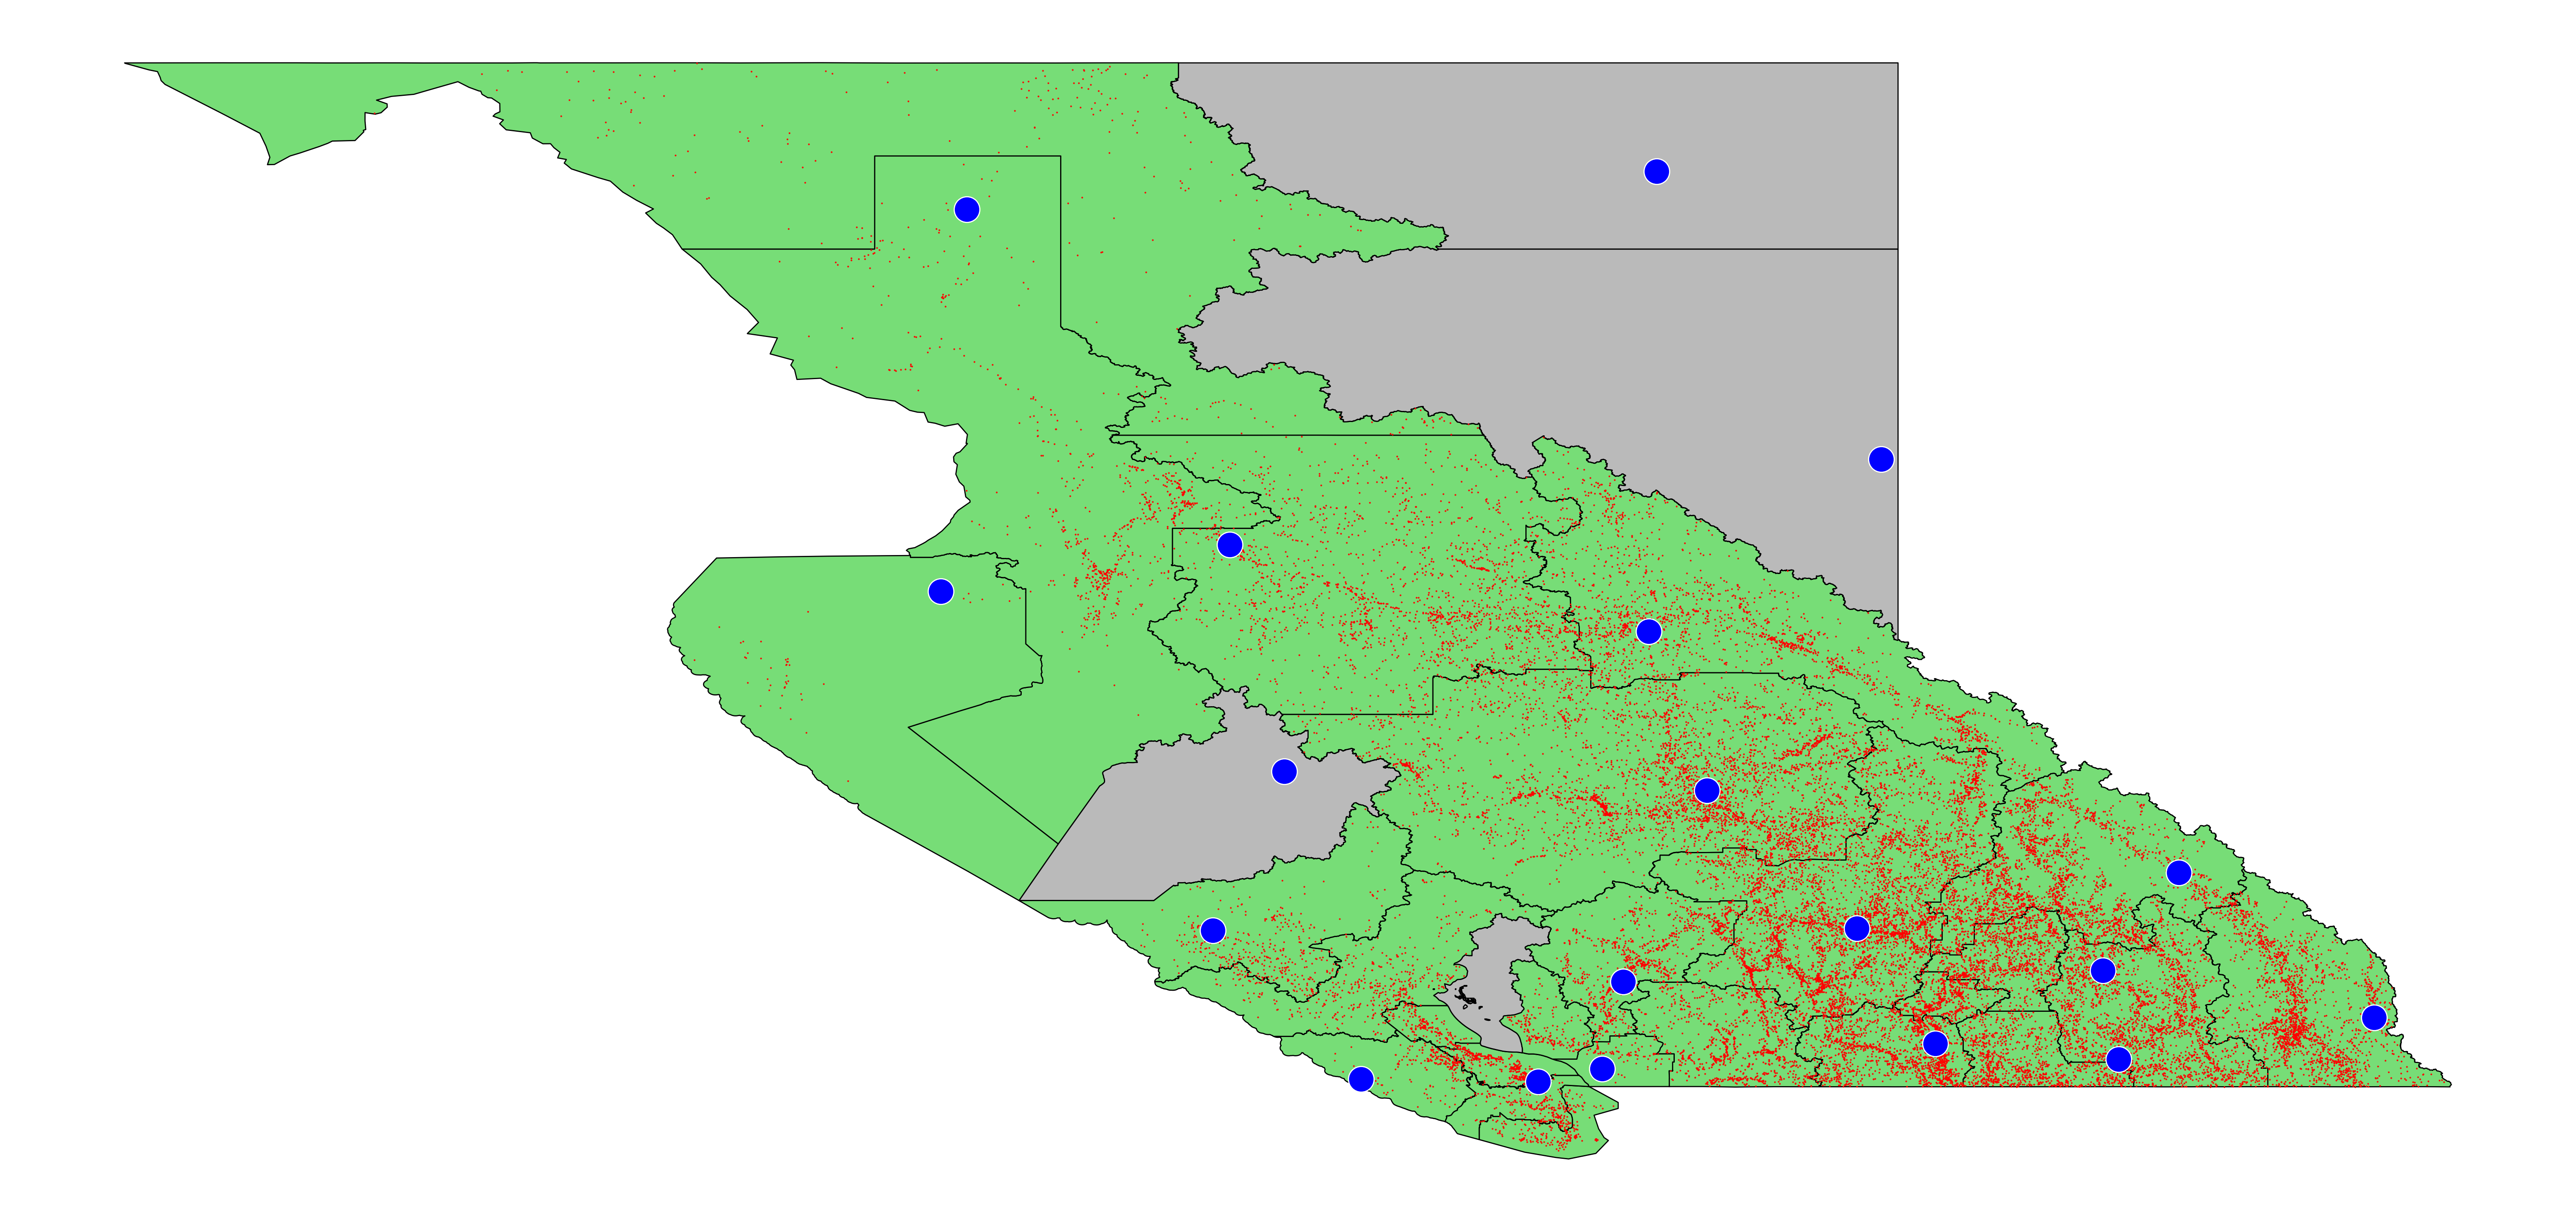

In [109]:
fig, ax = plt.subplots(figsize = (40,30),dpi=200)
polys2.plot(ax=ax,edgecolor='black', color=list(polys2['shading']))
fires.plot(ax=ax, marker='o', color='red', markersize=0.25)
outposts['coordinates'].plot(ax=ax, marker='o', color='blue', edgecolor='white', markersize=500)
plt.axis('off')
plt.savefig('output/geographic_visualization/map_visualization_single.png')


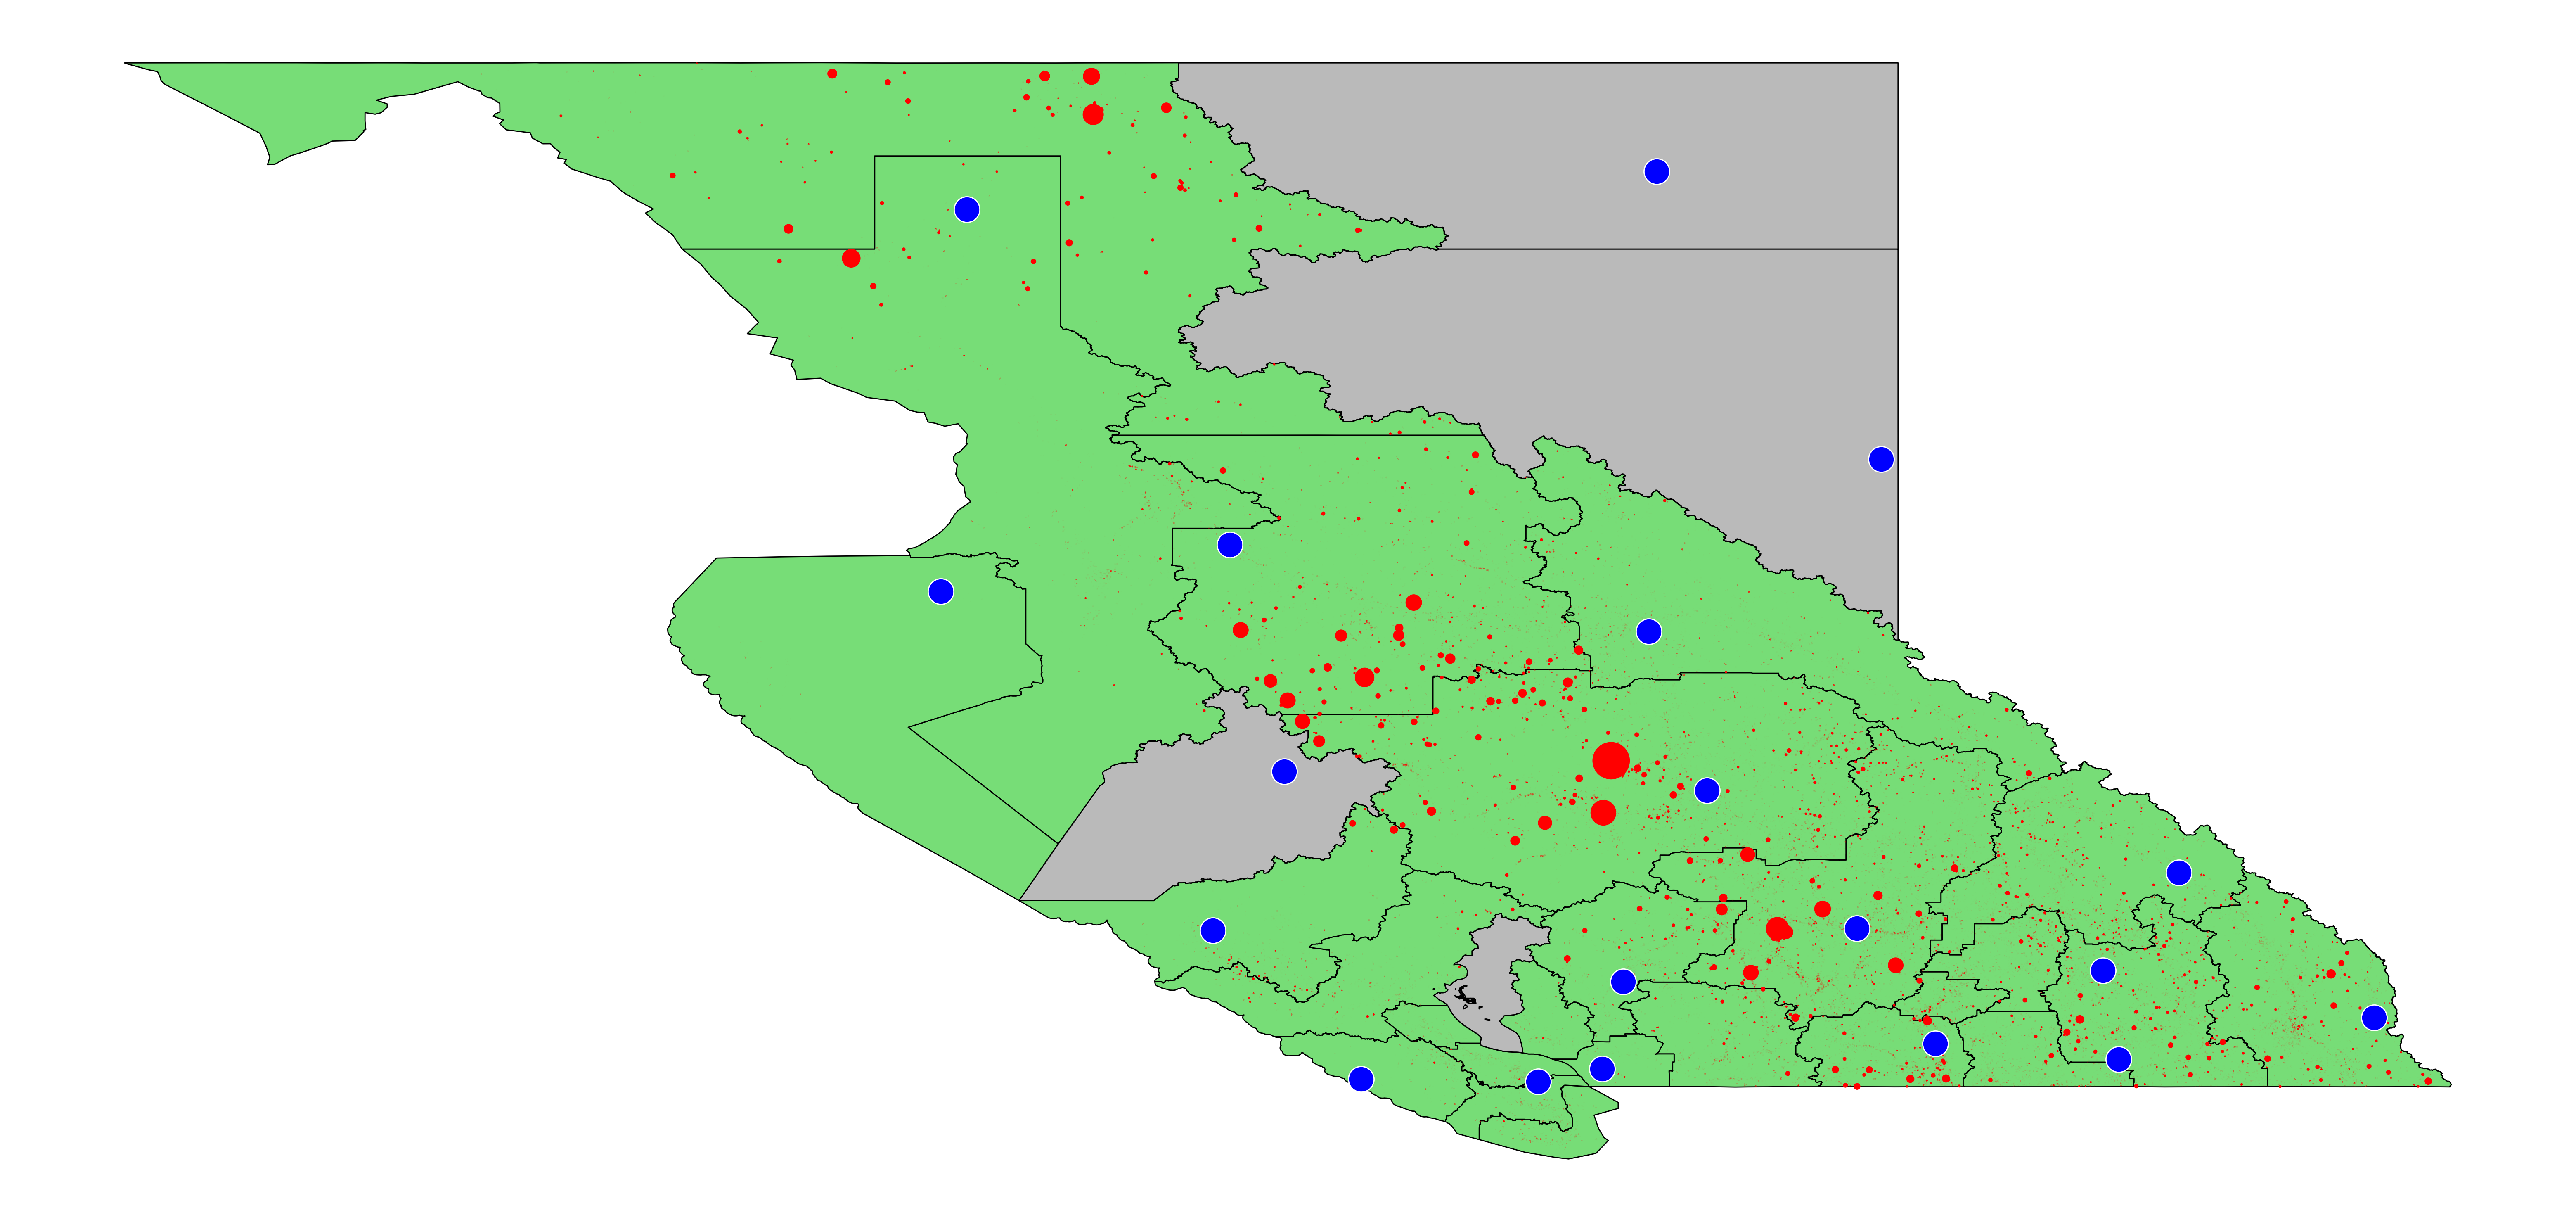

In [110]:
fig, ax = plt.subplots(figsize = (40,30),dpi=200)
#region_group_polys.plot(ax=ax, color = ['#80d2d7','#bebc88','#b5f7c8','#a4c19d','#cd9bc0','#fde5f3','#dee680'],legend=True)
polys2.plot(ax=ax,edgecolor='black', color=list(polys2['shading']))
fires.plot(ax=ax, marker='o', color='red', markersize=fire_sizes)
outposts['coordinates'].plot(ax=ax, marker='o', color='blue', edgecolor='white', markersize=500)
plt.axis('off')
plt.savefig('output/geographic_visualization/map_visualization_single_fire_sizes.png')
